In [1]:
%matplotlib inline
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
from numpy import sqrt, pi,sin,cos, linspace

# Correlations

In [11]:
#----------------parameters
Nc = 3;      #### photons ##
Nm = 12;     ## phonon dimension  

a = tensor(destroy(Nc),qeye(Nm),qeye(2))     # cavity anihilation operator
b = tensor(qeye(Nc), destroy(Nm),qeye(2))    # phonon anihilation operator
#N_pol= tensor(a.dag()*a , qeye(2)) + tensor(qeye(Nc) , sigmap()*sigmam())    # atom-cavity or polariton oprator

sz = tensor(qeye(Nc), qeye(Nm), sigmaz())
sigma_m = tensor(qeye(Nc), qeye(Nm), sigmam())
sigma_p = tensor(qeye(Nc), qeye(Nm), sigmap())

#psi0 = tensor(coherent(Nn,0.1),basis(Nm,1));
#rho0 = ket2dm(psi0)
#times;

#b.dag() * b
ptrace(a,0)

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = False
Qobj data =
[[ 0.        24.         0.       ]
 [ 0.         0.        33.9411255]
 [ 0.         0.         0.       ]]

In [114]:
#-----------------Open Q system-----
wm = 1.0
gamma_c = 1e-2 * wm     # cavity loss rate
gamma_a = gamma_c    

gamma_m = 1e-4 * wm              # mechanical loss rate
#wm = gamma_m * 1e4
gamma_inc = 0  # incoerent driving rate

wc= gamma_c * 1e4
wa=wc                       # resonance

F_p = gamma_a               # laser amplitude 

g_cm =  wm/10.0              # cavity-phonon coupling
#g_am = - wm/40.0           # atom_phonon coupling   ??????
g_ac =  wm/2.0              # cavity-atom coupling
# consider two cases
#g_polr = g_cm         # polariton-mechanics coupling
#g_polr = 0

nth = 3.45;
# ..........Collapse operators
collapse= []

collapse.append(sqrt (gamma_c) * a)
collapse.append(sqrt (gamma_a) * sigma_m)
collapse.append(sqrt (gamma_inc) * sigma_p)
collapse.append(sqrt(gamma_m*nth)*b.dag())
collapse.append(sqrt(gamma_m*(nth+1))*b)

# ..........Expectation valuses

#expct_ops=[]
#expct_ops.append(b.dag()*b)
  
######################################

# to have time independent H transform to rotating frame
# so substitude detuning for wc and wa 
# wp is frequency of driving field

g_amlist = np.linspace(0.25,0.75,15) * g_cm         # g_ac range 
delta_ac = wa-wc # detunung 
w_minus = wc/2.0 - sqrt((delta_ac**2)/4 + g_ac**2 )    # clacuting of w_m (eigen energy of polariton when n=1)
w_plus  = wc/2.0 + sqrt((delta_ac**2)/4 + g_ac**2 )
wp = w_minus - wm
delta_cp = wc-wp
delta_ap = wa-wp

#opt=Options(rhs_reuse=True, nsteps=5000)
bdagb=[]
adaga= []
for g_am in g_amlist:
       
    H = delta_cp * a.dag() * a  + delta_ap * sz/2 + wm * b.dag() * b + 1j *  g_ac * (sigma_p * a - sigma_m * a.dag()) \
    - g_cm * a.dag()* a * (b.dag() + b) - g_am * sz * (b.dag() + b) + 1j*F_p * (a.dag()-a)
   # H= H * 0

    rho = steadystate(H, collapse)
    
#    taus = np.linspace(0, 10.0, 2000)
#    num = mesolve(H, rho, taus, collapse, expct_ops, options=opt).expect[0]

#    bdagb.append(num)
    q=np.trace(b.dag()*b*rho)
    adaga.append(np.trace(a.dag()*a*rho))
    bdagb.append(expect(b.dag()*b,rho))
    
delta_cp
delta_ap
w_minus
w_plus

50.5

In [95]:
print(bdagb)
print(adaga)
#sqrt(3.45)

[2.856681196376707, 2.8573300655044513, 2.858241096926261, 2.8594167452449724, 2.8608599505294103]
[(3.9216128213524485e-08+0j), (3.9212919564803865e-08+0j), (3.92097168270536e-08+0j), (3.9206521617206754e-08+0j), (3.9203335376603615e-08+0j)]


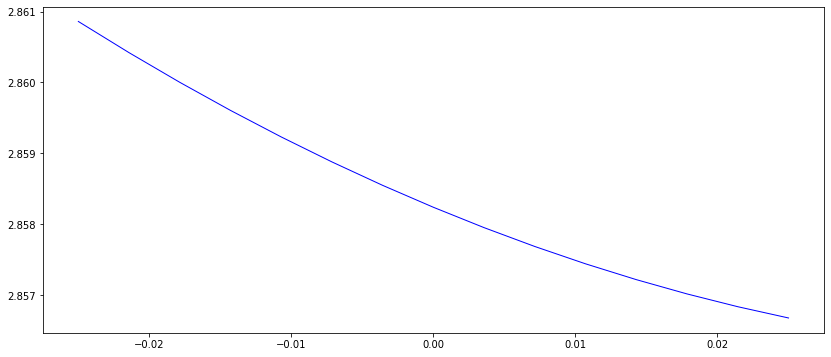

In [116]:
# for g_polr = g_cm 
# psi0 = tensor(basis(Nc,0), basis(Nm,1), basis(2,1))
fig, ax = plt.subplots(figsize=(14,6))
ax.plot((g_cm/2 -g_amlist) , (bdagb), color='b' , lw=1.0)
#plt.ylim([0.5, 1.25])

# Steady state

In [ ]:
#result1 = mesolve(H1, psi0, times,collapse,[])
#opt=Options(nsteps=5000)  #rhs_reuse=True,
# , options= opt

final_state = steadystate(H, collapse, use_rcm = True )

In [ ]:
#use_rcm = True  # to minimize the bandwidth of the modified Liouvillian steadystate(H, c_ops, method='power', use_rcm=True)
fexpt = expect(a.dag() * a, final_state)
tlist = np.linspace(0, 50, 100)

plt.axhline(y=fexpt, color='r', lw=1.5)
(fexpt)

# autocorrelation

In [ ]:
#time-dependent Liouvillian
#plt.semilogx()
# cor1 = correlation_2op_1t(H, None, tlist, [np.sqrt(0.5) * a], x, x)
# plot(times, np.real(corr1), tlist, np.real(corr2), times, np.real(corr3))
### for furiour transform 
# tlist = np.linspace(0, 100, 5000)
#corr = correlation_2op_1t(H, None, tlist, c_ops, a.dag(), a)
#wlist1, spec1 = spectrum_correlation_fft(tlist, corr)

#ax.plot(wlist1 / (2 * np.pi), spec1, 'b', lw=2, label='eseries method')

# Second-order correlation

In [162]:
#----------------parameters
Nc = 9;      #### photons ##
Nm = 9;     ## phonon dimension  

a = tensor(destroy(Nc),qeye(Nm),qeye(2))     # cavity anihilation operator
b = tensor(qeye(Nc), destroy(Nm),qeye(2))    # phonon anihilation operator
#N_pol= tensor(a.dag()*a , qeye(2)) + tensor(qeye(Nc) , sigmap()*sigmam())    # atom-cavity or polariton oprator

sz = tensor(qeye(Nc), qeye(Nm), sigmaz())
sigma_m = tensor(qeye(Nc), qeye(Nm), sigmam())
sigma_p = tensor(qeye(Nc), qeye(Nm), sigmap())
####################################################
#-----------------Open Q system-----
wm = 10.0
gamma_c = 1e-2 * wm     # cavity loss rate
gamma_a = gamma_c    

gamma_m = 1e-4 * wm              # mechanical loss rate
wm = gamma_m * 1e4
gamma_inc = gamma_c * 1e-3  # incoerent driving rate

wc= gamma_c * 1e4
wa=wc                       # resonance

F_p = gamma_a               # laser amplitude 

g_ac = wm/2.0              # cavity-atom coupling

g_am = - wm/40.0           # atom_phonon coupling   ??????
#g_cm = wm/10.0              # cavity-phonon coupling


# consider two cases  for g_polr=  g_cm - 2 * g_am  
#g_cm = 2  * g_am     # g_polr=0
g_cm = 2  * g_am + 1   # g_polr=1


nth = 3.45;
#######################################
# ..........Collapse operators
collapse= []

collapse.append(sqrt (gamma_c) * a)
collapse.append(sqrt (gamma_a) * sigma_m)
collapse.append(sqrt (gamma_inc) * sigma_p)
collapse.append(sqrt(gamma_m*nth)*b.dag())
collapse.append(sqrt(gamma_m*(nth+1))*b)

# ..........Expectation valuses

expct1_ops=[]
expct1_ops.append(b.dag()*b)
#expct1_ops.append(a.dag()*a)

# opt=Options(nsteps=10000) #where nsteps is some integer greater than 1000     
######################################
#----------------Ideal Dynamics

H = wc * a.dag() * a  + wa * sz/2 + wm * b.dag() * b + 1j *  g_ac * (sigma_p * a - sigma_m * a.dag()) \
   - g_cm * a.dag()* a * (b.dag() + b) - g_am * sz * (b.dag() + b)


g_ac
gamma_c/wm
wa/gamma_a
g_ac/wm
gamma_inc/gamma_c
g_cm/wm
wc/gamma_c

10000.0

In [166]:
# for steady state
taus = np.linspace(0, 50.0, 6000)

rho0 = steadystate(H, collapse)
opt=Options(rhs_reuse=True, nsteps=7000)
    # first calculate the occupation number as a function of time
n = mesolve(H, rho0, taus, collapse, [a.dag() * a], options=opt).expect[0]

In [167]:
opt=Options(rhs_reuse=True,nsteps=5000)
G2 = correlation_3op_1t(H, rho0, taus, collapse, a.dag(), a.dag()*a, a, options=opt)
g2 = G2 / (n[0] * n)
correlation_ss

(0.5, 1.25)

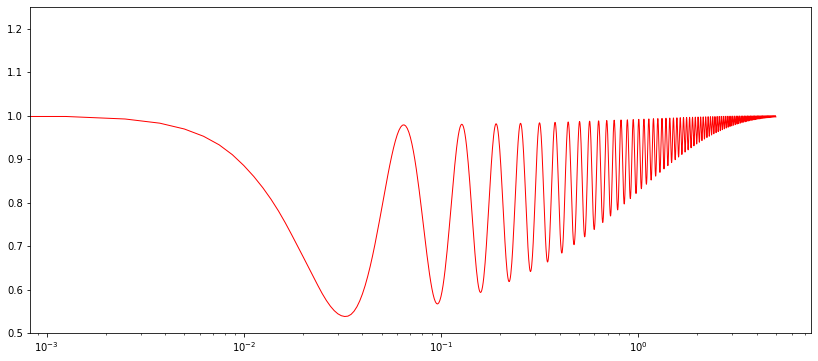

In [161]:
# for g_polr = 0

fig, ax = plt.subplots(figsize=(14,6))
plt.semilogx(taus* gamma_c, np.real(g2), color='r' , lw=1.0)
plt.ylim([0.5, 1.25])
#plt.xlim([0, 1.25])

(0.5, 1.25)

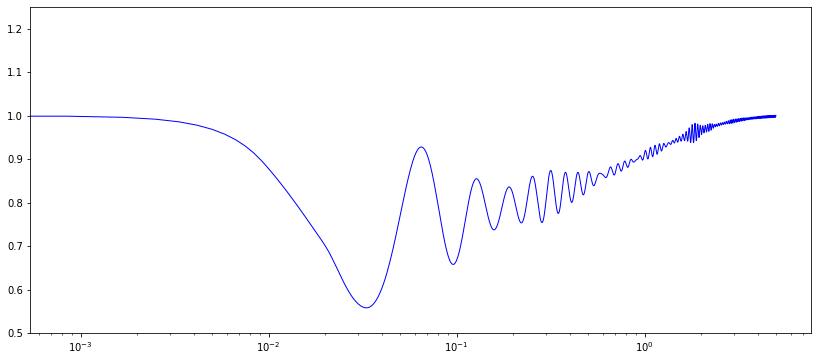

In [168]:
# for g_polr = g_cm 

fig, ax = plt.subplots(figsize=(14,6))
plt.semilogx(taus* gamma_c, np.real(g2), color='b' , lw=1.0)
plt.ylim([0.5, 1.25])


In [ ]:
# for g_polr = 0

fig, ax = plt.subplots(figsize=(14,6))
plt.semilogx(taus* gamma_c, np.real(g2), color='r' , lw=1.0)
plt.ylim([0.5, 1.25])
#plt.xlim([0, 1.25])


In [ ]:
# for g_polr = g_cm 

fig, ax = plt.subplots(figsize=(14,6))
plt.semilogx(taus* gamma_c, np.real(g2), color='b' , lw=1.0)
plt.ylim([0.5, 1.25])

In [ ]:
# for g_polr = g_cm 

fig, ax = plt.subplots(figsize=(14,6))
plt.semilogx(taus* gamma_c, np.real(g2), color='b' , lw=1.0)
plt.ylim([0.5, 1.25])


# Fourier transform 

In [ ]:
# for g_polr/g_cm = 0 
wlist1, spec1 = spectrum_correlation_fft(taus, g2)
fig, ax = plt.subplots(figsize=(14,6))

plt.semilogy((wlist1), np.abs(spec1)**2, color='r' , lw=1.0)

In [ ]:
# for g_polr/g_cm = 1 
wlist1, spec1 = spectrum_correlation_fft(taus, g2)
fig, ax = plt.subplots(figsize=(14,6))
#ax.plot((wlist1 )/ (wm) , np.abs(spec1)**2, 'b', lw=2,)
plt.semilogy((wlist1), np.abs(spec1)**2, color='r' , lw=1.0)

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))
plt.semilogx(taus* gamma_c, np.real(g2), color='r' , lw=1.0)
plt.ylim([0, 1.25])
# for g_polr = 0

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))
plt.semilogx(taus* gamma_c, np.real(g2), color='b' , lw=1.0)
plt.ylim([0, 1.25])
ax.set_xlabel('Time', fontsize=13)
ax.set_ylabel('second-order autocorrelation', fontsize=12)
# for g_polr/g_cm = 1 

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))
plt.semilogx(taus* gamma_c, np.real(g2), color='b' , lw=1.0)
plt.ylim([0, 1.25])
ax.set_xlabel('Time', fontsize=13)
ax.set_ylabel('second-order autocorrelation', fontsize=12)
# for g_polr/g_cm = 1 

# Fourier transform 

In [ ]:
wlist1[1]
wc+2*wm

In [ ]:
# for g_polr/g_cm = 1 
wlist1, spec1 = spectrum_correlation_fft(taus, g2)
fig, ax = plt.subplots(figsize=(14,6))
#ax.plot((wlist1 )/ (wm) , np.abs(spec1)**2, 'b', lw=2,)
plt.semilogy((wlist1-wc )/wm , np.abs(spec1)**2, color='b' , lw=1.0)

In [ ]:
# for g_polr/g_cm = 1 
wlist1, spec1 = spectrum_correlation_fft(taus, G2)
fig, ax = plt.subplots(figsize=(14,6))
#ax.plot((wlist1 )/ (wm) , np.abs(spec1)**2, 'b', lw=2,)
plt.semilogy((wlist1 ) / (2 * np.pi), np.abs(spec1)**2, color='b' , lw=1.0)

In [ ]:
(wlist1)[5]
wc

In [ ]:
wlist1[0], wlist1[599]*g_ac